In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('dataset/flight-weather.csv', nrows =10000)
X.drop(['dep_delay','carrier','tailnum','origin','dest'],axis=1,inplace=True)
# X = pd.read_csv('dataset/flight-weather.csv', usecols=['dep_delay','dep_time', 'HOURLYVISIBILITY', 'HOURLYWindSpeed',
#        'HOURLYPrecip', 'HOURLYRelativeHumidity'], nrows =1000)
y = pd.read_csv('dataset/flight-weather.csv', usecols= ['dep_delay'], nrows =10000).values
y[y <= 0] = np.False_
y[y > 0] = np.True_

# Linear classifier

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

### split dataset

In [6]:

model1 = LogisticRegression()
model1.fit(X_train, y_train)

print(model1.score(X_test, y_test))
y_pred1 = model1.predict(X_test)

print(metrics.classification_report(y_test, y_pred1, target_names=['non delay','delay']))

0.8036666666666666
              precision    recall  f1-score   support

   non delay       0.80      0.90      0.85      1817
       delay       0.81      0.66      0.73      1183

    accuracy                           0.80      3000
   macro avg       0.80      0.78      0.79      3000
weighted avg       0.80      0.80      0.80      3000



### 10-fold cross-validation

In [7]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred2 = cross_val_score(model2, X_test, y_test, cv=10)
print(y_pred2)
print('average: ' + str(np.average(y_pred2)))

[0.78       0.80333333 0.80666667 0.79333333 0.82       0.81666667
 0.79666667 0.83       0.78333333 0.80333333]
average: 0.8033333333333333


### linearly separable

In [8]:
from sklearn.linear_model import Perceptron
model3 = Perceptron(tol=1e-3, random_state=0)
model3.fit(X, y)
print(model3.score(X, y))

y_pred3 = cross_val_score(model3, X_train, y_train, cv=10, scoring="accuracy")
print(y_pred3)
print('average accuracy: ' + str(np.average(y_pred3)))


0.7459
[0.71285714 0.68571429 0.70857143 0.70857143 0.76714286 0.70142857
 0.70714286 0.74714286 0.76       0.73857143]
average accuracy: 0.7237142857142856


## summary:
#### Both score and accuracy are not high, so my dataset is not linearly separable

# Multilayer Perceptron

In [9]:
# ! conda install tensorflow

In [10]:
import tensorflow as tf
import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#use models.Sequential() build neural network
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(80, activation = "sigmoid", kernel_regularizer = tf.keras.regularizers.l2()),
    # tf.keras.layers.Dense(4, activation = "tanh", kernel_regularizer = tf.keras.regularizers.l2())
])

# compile  model
model4.compile(
    optimizer = tf.keras.optimizers.SGD(lr = 0.1), # SGD optimiser，learning rate0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #Configuration loss function
    metrics = ['sparse_categorical_accuracy'] # Annotate network evaluation indicators
)
 
# model.fit()
model4.fit(X_train, y_train)

results4 = model4.evaluate(X_test,  y_test, verbose = 0)
print('Accuracy: ', results4[1])

219/219 [==============================] - 1s 1ms/step - loss: 2.2666 - sparse_categorical_accuracy: 0.6020
Accuracy:  0.6086666584014893


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#use models.Sequential() build neural network
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(5, activation = "sigmoid", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(4, activation = "sigmoid", kernel_regularizer = tf.keras.regularizers.l2())
])
 
# compile  model
model5.compile(
    optimizer = tf.keras.optimizers.SGD(lr = 0.1), # SGD optimiser，learning rate0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #Configuration loss function
    metrics = ['sparse_categorical_accuracy'] # Annotate network evaluation indicators
)
 
# model.fit()
model5.fit(X_train, y_train)

results5 = model5.evaluate(X_test,  y_test, verbose = 0)
print('Accuracy: ', results5[1])

219/219 [==============================] - 1s 2ms/step - loss: 0.9166 - sparse_categorical_accuracy: 0.5919
Accuracy:  0.612666666507721


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#use models.Sequential() build neural network
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(50, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2())
])
 
# compile  model
model6.compile(
    optimizer = tf.keras.optimizers.SGD(lr = 0.1), # SGD optimiser，learning rate0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #Configuration loss function
    metrics = ['sparse_categorical_accuracy'] # Annotate network evaluation indicators
)

model6.fit(X_train, y_train)

results = model6.evaluate(X_test,  y_test, verbose = 0)
print('Accuracy: ', results[1])

219/219 [==============================] - 1s 2ms/step - loss: 1.3663 - sparse_categorical_accuracy: 0.6071
Accuracy:  0.6050000190734863


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#use models.Sequential() build neural network
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(80, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(1000, activation = "sigmoid", kernel_regularizer = tf.keras.regularizers.l2())
])

# compile  model
model7.compile(
    optimizer = tf.keras.optimizers.SGD(lr = 0.1), # SGD optimiser，learning rate0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #Configuration loss function
    metrics = ['sparse_categorical_accuracy'] # Annotate network evaluation indicators
)

model7.fit(X_train, y_train)

results = model7.evaluate(X_test,  y_test, verbose = 0)
print('Accuracy: ', results[1])

219/219 [==============================] - 2s 6ms/step - loss: 3.7295 - sparse_categorical_accuracy: 0.5766
Accuracy:  0.6146666407585144


## summary:

## My dataset has no linear separability

## Although neural networks are the best suited to image datasets, so it haven't good perform in my purely number datasets.

## Activation function is to introduce the nonlinearity of the neural network. If dosn't added, the convolutional layer and the fully connected layer are just simple linear operations, only the upper layer data is linearly combined into the lower layer data, and there is still no solution to the linear inseparable problem.

# Convolutional Neural Network 

In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 3.9584 - accuracy: 0.5940 - val_loss: 3.5592 - val_accuracy: 0.6090
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 3.0104 - accuracy: 0.6094 - val_loss: 2.5282 - val_accuracy: 0.6090
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 2.2662 - accuracy: 0.6094 - val_loss: 1.9006 - val_accuracy: 0.6090
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 1.8232 - accuracy: 0.6094 - val_loss: 1.4986 - val_accuracy: 0.6090
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 1.5733 - accuracy: 0.6094 - val_loss: 1.2446 - val_accuracy: 0.6090
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 1.3993 - accuracy: 0.6094 - val_loss: 1.0797 - val_accuracy: 0.6090
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2751 - accuracy: 0.6094 - val_loss: 0.9692 - val_accuracy: 0.6090
Epoch 

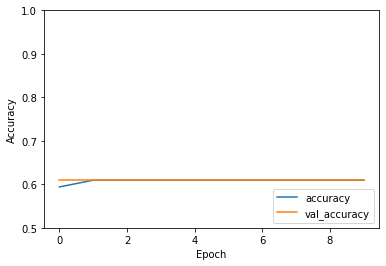

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

cnn1 = tf.keras.models.Sequential(
    [
        keras.layers.Dense(
            512, activation="relu", input_shape=[27]
        ),
        keras.layers.Dense(100, activation="softmax"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(80, activation="sigmoid")
    ]
)

cnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = cnn1.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn1.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 1.3527 - accuracy: 0.3449 - val_loss: 1.2482 - val_accuracy: 0.4007
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2391 - accuracy: 0.4550 - val_loss: 1.1525 - val_accuracy: 0.5993
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 1.1743 - accuracy: 0.5057 - val_loss: 1.0993 - val_accuracy: 0.5993
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 1.1488 - accuracy: 0.5076 - val_loss: 1.0715 - val_accuracy: 0.5993
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 1.1325 - accuracy: 0.5079 - val_loss: 1.0543 - val_accuracy: 0.5993
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 1.1175 - accuracy: 0.5133 - val_loss: 1.0435 - val_accuracy: 0.5993
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 1.1031 - accuracy: 0.5229 - val_loss: 1.0356 - val_accuracy: 0.5993
Epoch 

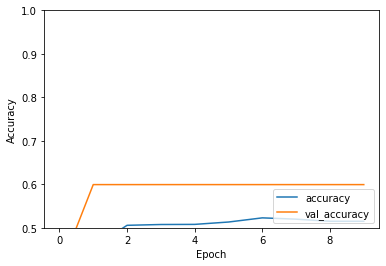

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

cnn2 = tf.keras.models.Sequential(
    [
        keras.layers.Dense(
            512, activation="relu", input_shape=[27]
        ),
        keras.layers.Dense(6, activation="softmax"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(5, activation="sigmoid"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(4, activation="sigmoid"),
        keras.layers.Dropout(0.3),
    ]
)

cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = cnn2.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn2.evaluate(X_test,  y_test, verbose=2)
print(test_acc)



Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 3.6002 - accuracy: 0.5597 - val_loss: 3.3669 - val_accuracy: 0.6063
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 3.1668 - accuracy: 0.6106 - val_loss: 2.9743 - val_accuracy: 0.6063
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 2.7980 - accuracy: 0.6106 - val_loss: 2.6145 - val_accuracy: 0.6063
Epoch 4/10
219/219 [==============================] - 1s 2ms/step - loss: 2.4707 - accuracy: 0.6106 - val_loss: 2.2928 - val_accuracy: 0.6063
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 2.1924 - accuracy: 0.6106 - val_loss: 2.0129 - val_accuracy: 0.6063
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 1.9535 - accuracy: 0.6106 - val_loss: 1.7760 - val_accuracy: 0.6063
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 1.7658 - accuracy: 0.6106 - val_loss: 1.5801 - val_accuracy: 0.6063
Epoch 

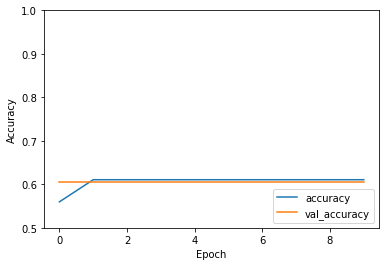

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

cnn3 = tf.keras.models.Sequential(
    [
        keras.layers.Dense(
            512, activation="relu", input_shape=[27]
        ),
        keras.layers.Dense(60, activation="softmax"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(50, activation="relu")
    ]
)

cnn3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = cnn3.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn3.evaluate(X_test,  y_test, verbose=2)
print(test_acc)



Epoch 1/10
219/219 [==============================] - 2s 10ms/step - loss: 6.3843 - accuracy: 0.4950 - val_loss: 5.9440 - val_accuracy: 0.6107
Epoch 2/10
219/219 [==============================] - 2s 9ms/step - loss: 5.9317 - accuracy: 0.5133 - val_loss: 5.9150 - val_accuracy: 0.6107
Epoch 3/10
219/219 [==============================] - 2s 7ms/step - loss: 5.9261 - accuracy: 0.5039 - val_loss: 5.9124 - val_accuracy: 0.6107
Epoch 4/10
219/219 [==============================] - 2s 9ms/step - loss: 5.9265 - accuracy: 0.4990 - val_loss: 5.9117 - val_accuracy: 0.6107
Epoch 5/10
219/219 [==============================] - 2s 9ms/step - loss: 5.9187 - accuracy: 0.5069 - val_loss: 5.9115 - val_accuracy: 0.6107
Epoch 6/10
219/219 [==============================] - 2s 11ms/step - loss: 5.9183 - accuracy: 0.5040 - val_loss: 5.9114 - val_accuracy: 0.6107
Epoch 7/10
219/219 [==============================] - 2s 9ms/step - loss: 5.9001 - accuracy: 0.5166 - val_loss: 5.9113 - val_accuracy: 0.6107
Epoc

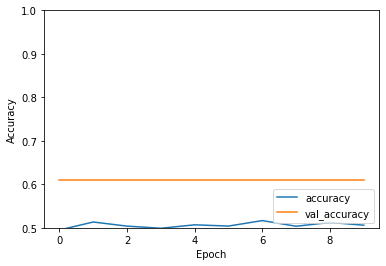

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

cnn4 = tf.keras.models.Sequential(
    [
        keras.layers.Dense(
            512, activation="relu", input_shape=[27]
        ),
        keras.layers.Dense(1000, activation="softmax"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(80, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1000, activation="sigmoid"),
        keras.layers.Dropout(0.3),
    ]
)

cnn4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history4 = cnn4.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn4.evaluate(X_test,  y_test, verbose=2)
print(test_acc)



In [20]:
X

,Unnamed: 0,HOURLYVISIBILITY,HOURLYWindSpeed,HOURLYPrecip,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYStationPressure,HOURLYSeaLevelPressure,...,month,day,dep_time,arr_time,arr_delay,flight,air_time,distance,hour,minute
0,0,10.0,6.0,0.00,76.0,80.0,75.0,72.0,29.81,29.83,...,6,30,940,1216,-4,407,313,2475,9,40
1,1,10.0,11.0,0.00,68.0,67.0,61.0,56.0,30.09,30.11,...,5,7,1657,2104,10,329,216,1598,16,57
2,2,10.0,6.0,0.00,56.0,31.0,27.0,17.0,30.58,30.60,...,12,8,859,1238,11,422,376,2475,8,59
3,3,10.0,14.0,0.00,57.0,54.0,47.0,39.0,30.03,30.05,...,5,14,1841,2122,-34,2391,135,1005,18,41
4,4,10.0,9.0,0.00,42.0,87.0,70.0,61.0,29.92,29.94,...,7,21,1102,1230,-8,3652,50,296,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10.0,18.0,0.00,32.0,36.0,28.0,9.0,29.68,29.70,...,3,21,2056,2247,1,4672,135,872,20,56
9996,9996,10.0,7.0,0.00,66.0,50.0,45.0,39.0,30.12,30.14,...,10,21,653,1002,1,1879,158,1076,6,53
9997,9997,4.0,15.0,0.03,89.0,39.0,38.0,36.0,29.91,29.93,...,2,23,1951,55,60,1613,189,1598,19,51
9998,9998,10.0,17.0,0.00,39.0,70.0,56.0,44.0,29.74,29.76,...,5,16,1600,1712,60,3404,44,187,16,0
